In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pulse_duration_ns = 2             # Pulse duration in nanoseconds
pulse_energy_µj = 200             # Energy per pulse in microjoules
duty_cycle_percent = 10           # Duty cycle (percent)
time_window_s = 1.0               # Total time to simulate (seconds)

# Convert units
pulse_duration_s = pulse_duration_ns * 1e-9
pulse_energy_j = pulse_energy_µj * 1e-6
duty_cycle = duty_cycle_percent / 100.0

# Time "on"
time_on_s = duty_cycle * time_window_s

# Number of pulses
num_pulses = int(time_on_s / pulse_duration_s)

# Total energy
total_energy_j = num_pulses * pulse_energy_j

# Average power
average_power_w = total_energy_j / time_window_s

# Results
print(f"Laser Pulse Simulation:")
print(f"------------------------")
print(f"Pulse duration       : {pulse_duration_ns} ns")
print(f"Pulse energy         : {pulse_energy_uj} µJ")
print(f"Duty cycle           : {duty_cycle_percent}%")
print(f"Simulation window    : {time_window_s} seconds")
print(f"Time laser is ON     : {time_on_s:.3f} seconds")
print(f"Number of pulses     : {num_pulses:,}")
print(f"Total energy         : {total_energy_j:.0f} J or {total_energy_j/1e3:.2f} kJ")
print(f"Average power output : {average_power_w:.0f} W or {average_power_w/1e3:.2f} kW")

#plt.legend()
#plt.grid(color = 'k', linestyle = '-', linewidth = 0.5)
#plt.show()



Laser Pulse Simulation:
------------------------
Pulse duration       : 2 ns
Pulse energy         : 200 µJ
Duty cycle           : 10%
Simulation window    : 1.0 seconds
Time laser is ON     : 0.100 seconds
Number of pulses     : 50,000,000
Total energy         : 10000 J or 10.00 kJ
Average power output : 10000 W or 10.00 kW


In [23]:
# -----------------------------
# Circular orbital velocity at 500 km altitude
# -----------------------------
# Constants
G = 6.67430e-11  # m^3/kg/s^2
M_earth = 5.972e24  # kg
R_earth = 6371e3  # m
altitude = 500e3  # m

# Orbital radius
r = R_earth + altitude

# Circular orbital velocity 𝑣 = √𝐺𝑀/r

v = np.sqrt(G * M_earth / r)

# Print results
print(f"Circular orbital velocity at 500 km altitude: {v:.2f} m/s or {v/1e3:.2f} km/s")

Circular orbital velocity at 500 km altitude: 7616.45 m/s or 7.62 km/s


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # speed of light in m/s

# Input Parameters
grating_lpm = 1500                      # lines per mm
center_wavelength_nm = 1040            # central wavelength (nm)
wavelength_span_nm = 14                # total span (nm)
altitude_km = 500                      # observation altitude (km)

# Derived Values
d = 1 / (grating_lpm * 1e3)            # groove spacing in meters
lambda_center = center_wavelength_nm * 1e-9
delta_lambda = wavelength_span_nm * 1e-9
altitude_m = altitude_km * 1e3

# Angular divergence (small angle approx)
delta_theta_rad = delta_lambda / d

# Ground footprint
footprint_m = altitude_m * delta_theta_rad
footprint_km = footprint_m / 1000

# Print summary
print("=== Grating Divergence Calculations ===")
print(f"Grating: {grating_lpm} lines/mm")
print(f"Wavelength span: {wavelength_span_nm} nm around {center_wavelength_nm} nm")
print(f"Altitude: {altitude_km} km")
print(f"Angular divergence: {np.degrees(delta_theta_rad):.2f} degrees")
print(f"Beam footprint on ground: {footprint_km:.2f} km")

=== Grating Divergence Calculations ===
Grating: 1500 lines/mm
Wavelength span: 14 nm around 1040 nm
Altitude: 500 km
Angular divergence: 1.20 degrees
Beam footprint on ground: 10.50 km


--- Altitude: 4.5 km ---
Spot size on ground = 0.233 m
Span size on ground = 58.833 m

--- Altitude: 400.0 km ---
Spot size on ground = 20.720 m
Span size on ground = 5229.600 m



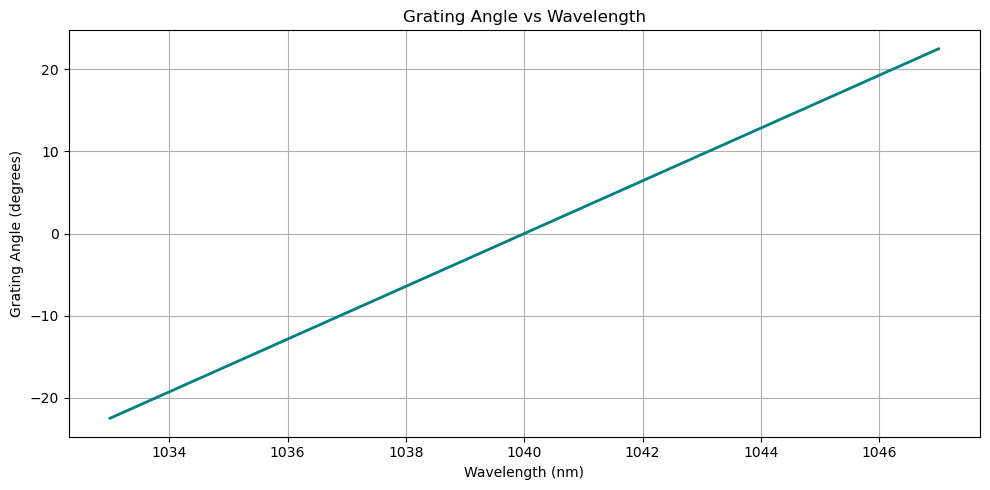

In [25]:
# -----------------------------
# Wavelength and Spectral Properties
# -----------------------------
center_wavelength_nm = 1040                      # nanometers
wavelength_span_nm = 14                          # nanometers
num_wavelengths_per_sweep = 256
frequency_space_ghz = 14.4                       # GHz
angle_separation_urad = 51.8                     # µrad
total_angle_span_mrad = 13.074                   # mrad
separation_on_ground_m = 0.232                   # at 4.5 km altitude

# -----------------------------
# Timing and Sweep Properties
# -----------------------------
laser_sweep_rate_khz = 4.5                       # kHz
sweeps_per_cycle = 8
selected_wavelengths_per_sweep = 30

# -----------------------------
# Laser Pulse and Optical Performance
# -----------------------------
lidar_pulse_width_ns = 2                         # ns
detector_output_pulse_width_ns = 10              # ns
lidar_peak_power_w = 723                         # W
transmitter_power_w = 0.222                      # W
transmitter_throughput = 0.90                    # unitless

# -----------------------------
# Beam and Optical Quality
# -----------------------------
laser_spot_size_ground_m = 0.233                 # meters (FWHM at 4.5 km)
beam_quality_m2 = 1.1

# -----------------------------
# Flight Configuration
# -----------------------------
airplane_speed_mps = 115                         # m/s
airplane_movement_per_8_sweeps_m = 0.203         # m
grating_lines_per_mm = 1500
telescope_aperture_cm = 60                       # cm

# -----------------------------
# Wavelength Spread Setup
# -----------------------------
wavelength_TM = np.linspace(1033, 1047, 257)     # nm
grating_angle_deg = np.linspace(-22.5, 22.5, 257)  # degrees

# -----------------------------
# Spot and Span Size Calculations
# -----------------------------
altitudes = [4.5e3, 400e3]  # meters: 4.5 km and 400 km

for alt in altitudes:
    spot_size = alt * angle_separation_urad * 1e-6       # m
    span_size = alt * total_angle_span_mrad * 1e-3       # m
    print(f"--- Altitude: {alt/1e3:.1f} km ---")
    print(f"Spot size on ground = {spot_size:.3f} m")
    print(f"Span size on ground = {span_size:.3f} m\n")

# -----------------------------
# Optional Plotting Section
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(wavelength_TM, grating_angle_deg, color='teal', linewidth=2)
plt.title("Grating Angle vs Wavelength")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Grating Angle (degrees)")
plt.grid(True)
plt.tight_layout()
plt.show()